# Business vs Recreationist runners analysis

We have scraped data from participants of the dam tot dam loop events that were held in 2016,2017 and 2018. The main myth that we would like to research is whether business runners run on average faster than recreational runners of the same sex. 

This led to the following questions that we will try to answer during this analysis.

# Assumptions

- Business runners run faster than recreational runners
- Female and male business runners run faster than the recreational runners of the same sex 

import the following libraries

In [56]:
import pandas as pd
from datetime import timedelta
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
import scipy.stats as stats
import re
pd.options.display.float_format = '{:,.2f}'.format

plt.rcParams["font.family"]="agency fb"

First we import the data set for business runners and recreationist. We have 3 years of data for business runners and 5 years for recreationist runners

First dataset <b> businessrunnersdtd_16_18.csv </b> contains the business runners https://drive.google.com/drive/folders/1PxVVV8jvPLDTuU3Fz6Umo4QN2aJcJJiw. Place it in the data folder of this repository

In [39]:
df_bus = pd.read_csv('data/businessrunnersdtd_16_18.csv').drop(columns=['Unnamed: 0']).drop_duplicates()

Second dataset contains the recreationist runners. <b>recreationalrunnersdtd_16_18.csv</b> 
https://drive.google.com/drive/folders/1PxVVV8jvPLDTuU3Fz6Umo4QN2aJcJJiw. Place it in the data folder of this repository

In [40]:
df_recr = pd.read_csv('data/recreationalrunnersdtd_16_18.csv').drop(columns=['Unnamed: 0'])

This prints the mean of the speed of the business and recreationist runners

In [58]:
print('Mean speed businsess runners : {0:.2f}'.format(df_bus['speed'].mean()),
      'Mean speed recreationist runners: {0:.2f}'.format(
      df_recr['speed'].mean()))

Mean speed businsess runners : 10.69 Mean speed recreationist runners: 10.43


plot the distribution of both sets

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


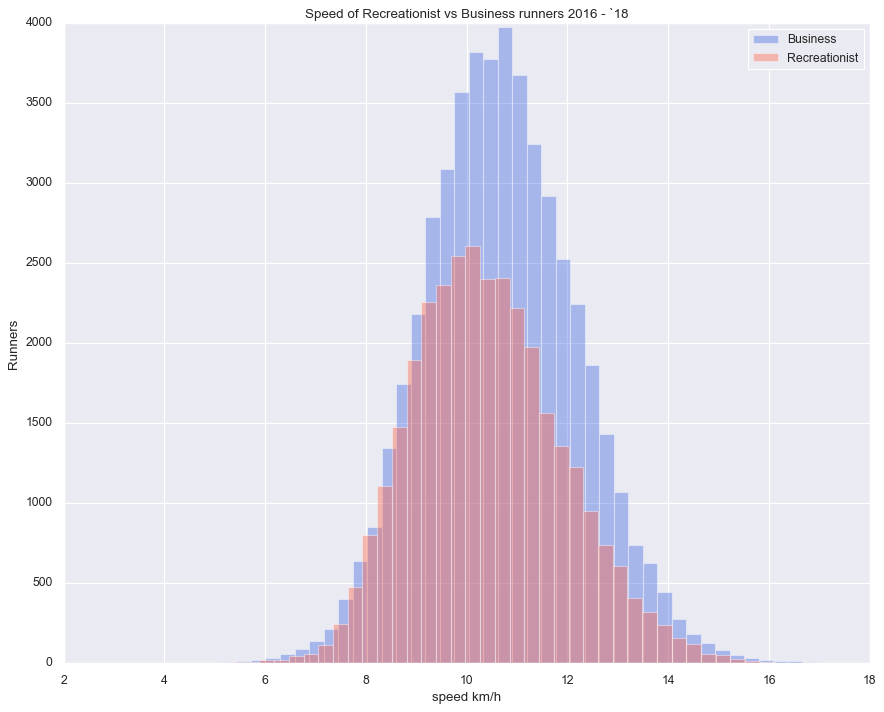

''

In [59]:
sns.set(rc={'figure.figsize':(13,10)})
sns.color_palette("Paired")
sns.distplot(df_bus['speed'],label='Business',kde=False,color="royalblue")
sns.distplot(df_recr['speed'],label='Recreationist',kde=False,color="tomato")
plt.title('Speed of Recreationist vs Business runners 2016 - `18')
plt.xlabel('speed km/h')
plt.legend()
plt.ylabel('Runners')
plt.show()
;

The results shows that the mean of business runners is higher than recreationist runners. We will start testing 
whether the means of both populations are statistically different.  

In [60]:
t, p = stats.ttest_ind(df_bus['speed'],df_recr['speed'], equal_var = False)

if p<0.05:
    print('We reject that H0 that means are the same')
else:
    print('We cannot reject that H0 that means are the same')
print(t,p)    

We reject that H0 that means are the same
24.56627816051719 1.0464330966542131e-132


This gives us the feeling that the business runners run faster. When running :) through the data we observed that business runners are predominantly male. In our previous assignment we learnerd that males run faster than females and that would explain why business runners run faster on average. 

We are going to check this. Our business runners dataset does not contain a column for gender we had to gender guess the sex based on their first names. 

We created the function <b>guess_gender()</b> to estimate the appropriate gender based on first names that we have in our dataset. It uses a combination of the libraries <b>gender_guesser</b> and <b>gender_detector</b>. How the script works is decribes in our <b><u>readme.txt</u></b>

Based on the outcome of the matching. We could managed to categorize about 23% names to a gender. For our business runners this identified the following numbers as male / female

In [77]:
df_bus.gender.value_counts(normalize=True)

male            0.58
female          0.25
unknown         0.13
mostly_male     0.02
mostly_female   0.01
andy            0.01
Name: gender, dtype: float64

In [78]:
df_bus.groupby('gender')['firstname'].agg(['count']).reset_index()

,gender,count
0,andy,472
1,female,12438
2,male,29183
3,mostly_female,617
4,mostly_male,1055
5,unknown,6645


For the recreationist runners the genders are more evenly represented

In [80]:
df_recr['sex'].value_counts() / len(df_recr)

Male     0.58
Female   0.42
Name: sex, dtype: float64

We will run a one sample t test to run the likelihood that that the mean would be belonging to a female sample

These numbers seems to explain why business runners run faster. We therefore run the tests again for males / females separately

In [89]:
females_bus = df_bus.loc[df_bus.gender.isin(['mostly_female', 'female'])]['speed']
females_recr = df_recr.loc[(df_recr.sex == 'Female') ]['speed']

print('Mean speed female business runners : {0:.2f}'.format(females_bus.mean()),
      'Mean speed female recreationist runners: {0:.2f}'.format(females_recr.mean()))

Mean speed female business runners : 9.95 Mean speed female recreationist runners: 9.84


In [90]:
males_bus = df_bus.loc[df_bus.gender.isin(['mostly_male', 'male'])]['speed']
males_recr = df_recr.loc[(df_recr.sex == 'Male') ]['speed']


print('Mean speed male business runners : {0:.2f}'.format(males_bus.mean()),
      'Mean speed male recreationist runners: {0:.2f}'.format(males_recr.mean()))

Mean speed male business runners : 11.03 Mean speed male recreationist runners: 10.86


For both males and females the speeds are higher for business runners than recreationist runners  

In [91]:
t, p = stats.ttest_ind(males_bus,
                       males_recr, equal_var = False)

if p<0.05:
    print('We reject that H0 that means are the same')
else:
    print('We cannot reject that H0 that means are the same')
print(t,p)    

We reject that H0 that means are the same
11.823741567222205 3.330247872076435e-32


In [92]:
t, p = stats.ttest_ind(females_bus,
                       females_recr, equal_var = False)

if p<0.05:
    print('We reject that H0 that means are the same')
else:
    print('We cannot reject that H0 that means are the same')
print(t,p)    

We reject that H0 that means are the same
7.4611127876060905 8.839897172273959e-14


In both cases we reject that the means are equal therefore finding statiscally reason to assume that business runnners are faster 

We are now going to test whether our assumptions holds for the three years individually

In [100]:
for i in range(2016,2019):
    
    t, p = stats.ttest_ind(
                       df_bus.loc[df_bus.gender.isin(['mostly_female', 'female']) & (df_bus.year == i) ]['speed'], 
                       df_recr.loc[(df_recr.sex == 'Female') & (df_recr.year == i) ]['speed'],    
                           equal_var = False)

    if p<0.05:
        print('We reject the H0 hypothesis: that means are the same for year {0}'.format(i))
    else:
        print('We cannot reject the H0 hypothesis: that means are the same for year {0}'.format(i))
    print(t,p)   

We reject the H0 hypothesis: that means are the same for year 2016
5.01034272841407 5.536175007770701e-07
We reject the H0 hypothesis: that means are the same for year 2017
5.667572500110779 1.493801407345559e-08
We reject the H0 hypothesis: that means are the same for year 2018
3.6403036264576194 0.0002739878091367549


In [101]:
for i in range(2016,2019):
    
    t, p = stats.ttest_ind(
                       df_bus.loc[df_bus.gender.isin(['mostly_male', 'male']) & (df_bus.year == i) ]['speed'], 
                        df_recr.loc[(df_recr.sex == 'Male') & (df_recr.year == i) ]['speed'],   
                           equal_var = False)

    if p<0.05:
        print('We reject the H0 hypothesis: that means are the same for year {0}'.format(i))
    else:
        print('We cannot reject the H0 hypothesis: that means are the same for year {0}'.format(i))
    print(t,p)   

We reject the H0 hypothesis: that means are the same for year 2016
5.606892264726779 2.1080493052690785e-08
We reject the H0 hypothesis: that means are the same for year 2017
9.02033148752497 2.1104417742545502e-19
We reject the H0 hypothesis: that means are the same for year 2018
7.686801494740641 1.6078682061488644e-14


# Our conclusions are:
    
    - It seems that the businessrun attracts relatively more males than female
    - Males that have participated in the 2016 - 2018 ran faster than males that participated in the recreational run 
    - Females participated in the 2016 - 2018 ran faster than females that participated in the recreational run 

# For further improvement.

- Test additional gender guessing algorithmes 
- We don't have age as a variable. We assume that business runners are in general younger than recreational runners